In [95]:
import geopandas as gpd 
import matplotlib.pyplot as plt

In [96]:
gdf_wards_jmc = gpd.read_parquet('data/jaipur_ward_with_jmc.geoparquet')
gdf_wards_jmc.to_crs('EPSG:4326', inplace=True)
gdf_wards_jmc.head()

,Id,Area,Ward_No,POP,DENS_PPH,NAME,assembly,jmc,X,Y,lon,lat,ward_id,geometry
0,1,502,1,11930,24,VIDHYADHAR NAGAR,VidyadharNgr_Assembly,150,574626.431817,2.988687e+06,75.752277,27.018317,G_1,"POLYGON ((75.74601 27.00898, 75.73282 27.02027..."
1,2,477,2,11096,23,VIDHYADHAR NAGAR,VidyadharNgr_Assembly,150,574052.087406,2.987101e+06,75.746393,27.004035,G_2,"POLYGON ((75.74601 27.00898, 75.75914 27.00912..."
2,3,150,3,12110,81,VIDHYADHAR NAGAR,VidyadharNgr_Assembly,150,575995.451217,2.987597e+06,75.766009,27.008404,G_3,"POLYGON ((75.75914 27.00912, 75.76543 27.01730..."
3,4,156,4,12097,78,VIDHYADHAR NAGAR,VidyadharNgr_Assembly,150,576790.537250,2.987811e+06,75.774036,27.010297,G_4,"POLYGON ((75.77059 26.99986, 75.77021 27.00214..."
4,5,453,5,12158,27,VIDHYADHAR NAGAR,VidyadharNgr_Assembly,150,578926.085803,2.987224e+06,75.795523,27.004871,G_5,"POLYGON ((75.77957 27.00536, 75.77965 27.00599..."


In [97]:
# change column names to lower case
gdf_wards_jmc.columns = gdf_wards_jmc.columns.str.lower()

In [98]:
for assem in gdf_wards_jmc.assembly.unique():
    print("Name: ", assem)
    gdf_ = gdf_wards_jmc[gdf_wards_jmc.assembly == assem]
    print("Assembly: ",gdf_.name.unique().tolist()) 
    print("=========")

Name:  VidyadharNgr_Assembly
Assembly:  ['VIDHYADHAR NAGAR']
Name:  Jhotwada_Assembly
Assembly:  ['JHOTWADA']
Name:  Sanganer_Assembly
Assembly:  ['SANGANER']
Name:  Bagru_Assembly
Assembly:  ['BAGRU']
Name:  MalviyaNgr_Assembly
Assembly:  ['MALVIYANAGAR']
Name:  Amer_Assembly
Assembly:  [None, 'AMER']
Name:  HawaMahal_Assembly
Assembly:  ['HAWAMAHAL']
Name:  CivilLines_Assembly
Assembly:  ['CIVIL LINES']
Name:  Kishanpole_Assembly
Assembly:  ['KISHANPOLE']
Name:  AdarshNgr_Assembly
Assembly:  ['ADARSH NAGAR']


In [99]:
# Clean up name and assembly (None = AMER)
gdf_wards_jmc['name'] = gdf_wards_jmc['name'].fillna('AMER')
gdf_wards_jmc['assembly'] = gdf_wards_jmc['name']

In [100]:
# Clean up ward_id G- if jmc 150 and H if 100 and then ward no
gdf_wards_jmc['jmc_name'] = gdf_wards_jmc['jmc'].apply(lambda x: 'Greater' if x == 150 else 'Heritage' if x == 100 else 'Unknown')
gdf_wards_jmc['ward_id'] = gdf_wards_jmc['jmc_name'].apply(
  lambda x: 'G-' if x == 'Greater' else 'H-' if x == 'Heritage' else ''
  ) + gdf_wards_jmc['ward_no'].astype(str)

In [111]:
# Get a random color tab20 hex6 by assembly
def get_random_color(assembly):
    import random
    random.seed(assembly)
    return f'#{random.randint(0, 0xFFFFFF):06x}'
gdf_wards_jmc['color_assembly'] = gdf_wards_jmc['assembly'].apply(get_random_color)

In [112]:
gdf_wards_jmc = gdf_wards_jmc[[ 
'ward_id', 'jmc','jmc_name', 'ward_no', 'assembly','color_assembly' ,'pop','dens_pph','geometry'
]]
gdf_wards_jmc.head()

,ward_id,jmc,jmc_name,ward_no,assembly,color_assembly,pop,dens_pph,geometry
0,G-1,150,Greater,1,VIDHYADHAR NAGAR,#abd0ac,11930,24,"POLYGON ((75.74601 27.00898, 75.73282 27.02027..."
1,G-2,150,Greater,2,VIDHYADHAR NAGAR,#abd0ac,11096,23,"POLYGON ((75.74601 27.00898, 75.75914 27.00912..."
2,G-3,150,Greater,3,VIDHYADHAR NAGAR,#abd0ac,12110,81,"POLYGON ((75.75914 27.00912, 75.76543 27.01730..."
3,G-4,150,Greater,4,VIDHYADHAR NAGAR,#abd0ac,12097,78,"POLYGON ((75.77059 26.99986, 75.77021 27.00214..."
4,G-5,150,Greater,5,VIDHYADHAR NAGAR,#abd0ac,12158,27,"POLYGON ((75.77957 27.00536, 75.77965 27.00599..."


<Axes: title={'center': 'Population Distribution by Ward'}, ylabel='Frequency'>

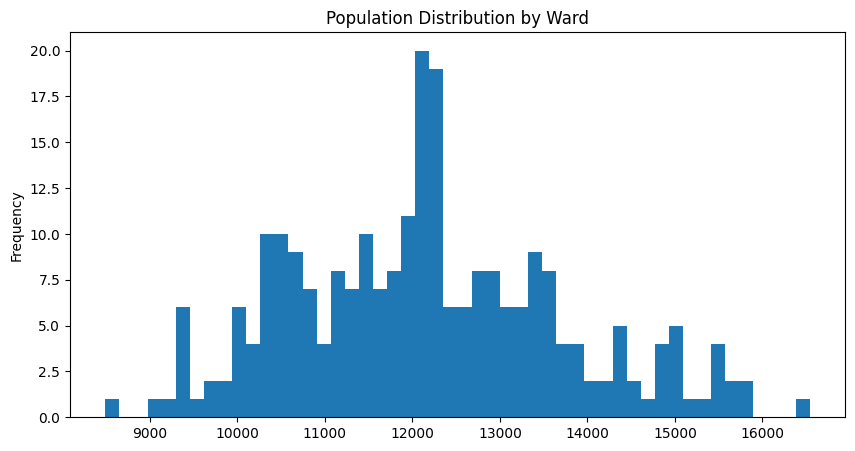

In [113]:
gdf_wards_jmc['pop'].plot(kind='hist', bins=50, figsize=(10, 5), title='Population Distribution by Ward')

In [114]:
gdf_wards_heritage = gdf_wards_jmc[gdf_wards_jmc.jmc_name == 'Heritage']
gdf_wards_greater = gdf_wards_jmc[gdf_wards_jmc.jmc_name == 'Greater']

<Axes: >

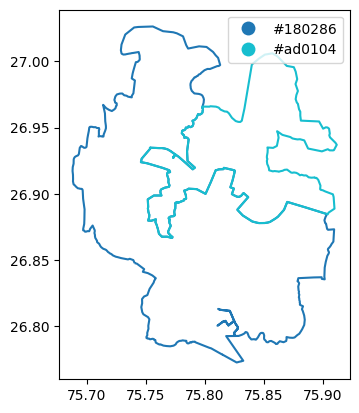

In [115]:
# get bounds
gdf_muni_bound = gdf_wards_jmc.dissolve(by='jmc_name').reset_index()
gdf_muni_bound['geometry'] = gdf_muni_bound['geometry'].apply(lambda x: x.exterior)
# Assing colour
gdf_muni_bound['color'] = gdf_muni_bound['jmc_name'].apply(
    lambda x: '#ad0104' if x == 'Heritage' else "#180286"
)
gdf_muni_bound.plot(column='color', legend=True)

In [116]:
# exports
gdf_wards_jmc.to_file('../../public/data/mapMain/jaipur_wards.geojson', driver='GeoJSON')
gdf_wards_heritage.to_file('../../public/data/mapMain/jaipur_wards_heritage.geojson', driver='GeoJSON')
gdf_wards_greater.to_file('../../public/data/mapMain/jaipur_wards_greater.geojson', driver='GeoJSON')
gdf_muni_bound.to_file('../../public/data/mapMain/jaipur_muni_bound.geojson', driver='GeoJSON')